In [1]:
from plotting.plotting import make_visual
from datasets.preprocessor import Preprocessor_2p5D
from load_config import load_config
import torch
import json

In [2]:
# %matplotlib ipympl

In [2]:
config = load_config()

In [3]:
preprocessor = Preprocessor_2p5D(config)

In [4]:
with open('./datasets/split.json', 'r') as f:
    split = json.load(f)


In [5]:
train_indices = split['train']
len(train_indices)

100

In [6]:
seg = preprocessor.get_seg(train_indices[0])
seg.shape

torch.Size([512, 512, 94])

In [11]:
(seg == 1).float().mean()

tensor(0.0251)

In [18]:
from tqdm import tqdm

results = []
for idx in tqdm(train_indices):
    seg = preprocessor.get_seg(idx)

    liver_pct = (seg == 1).float().mean()
    cancer_pct = (seg == 2).float().mean()

    results.append((liver_pct, cancer_pct))


100%|██████████| 100/100 [01:49<00:00,  1.09s/it]


In [19]:
import numpy as np
res_np = np.array(results)

In [20]:
res_np.shape

(100, 2)

In [21]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(data=res_np, columns=('liver', 'cancer'))
df


,liver,cancer
0,0.025107,0.000172
1,0.020232,0.000082
2,0.014994,0.000385
3,0.011253,0.000048
4,0.025214,0.001324
...,...,...
95,0.039384,0.012284
96,0.023512,0.002016
97,0.021850,0.000006
98,0.028218,0.004394


<AxesSubplot: xlabel='cancer', ylabel='liver'>

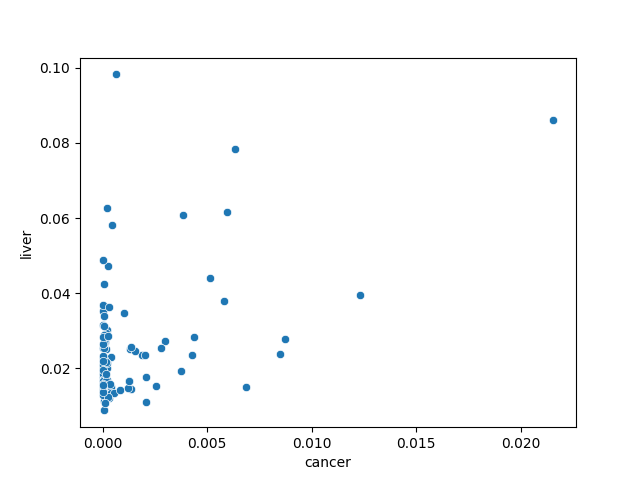

In [22]:
%matplotlib ipympl
sns.scatterplot(data=df, x='cancer', y='liver')

In [6]:
vol, seg = img
vol.shape

(512, 512, 333)

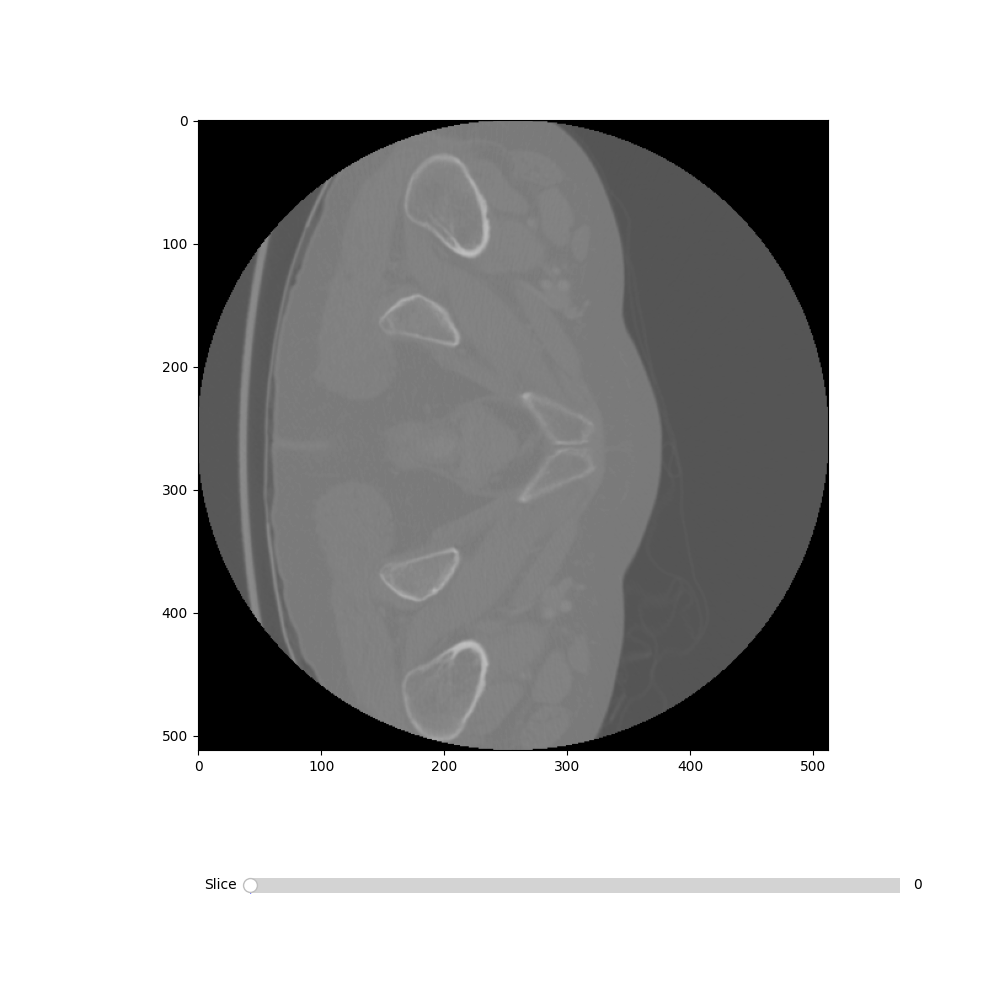